# Assigment Python 2

Nama    : Farah Alysa Putri <br>
Program : Introduction to Python for Data Science <br>
Batch   : 02/001 <br>
Dataset : NYC Property Sales

## Import Libraries

In [332]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
from numpy import nan
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt

## Data Loading

Pada Assignment 2, dataset yang digunakan adalah dataset NYC Property Sales yang merupakan catatan setiap bangunan atau unit bangunan (apartemen, dll.) yang dijual di property market  New York selama periode 12 bulan. 

In [333]:
df = pd.read_csv('nyc-rolling-sales.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [334]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Variabel-variabel pada dataset: <br>
1. BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
2. BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
3. BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.

## Preprocessing

In [335]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [336]:
# Menghapus kolom Unnamed
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [337]:
# Mengganti type SALE DATE menjadi datetime
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

In [338]:
# variabel numerik
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [339]:
# variabel kategorik
categorical = ['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [340]:
df.shape

(84548, 21)

Dataset terdiri dari 48244 baris dan 21 kolom

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [342]:
# Mengecek duplikasi data
dups = df.duplicated()
print(dups.any())

True


In [343]:
df.duplicated().sum()

765

Terdapat 765 data duplikasi

In [344]:
# Menghapus data duplikasi
df = df.drop_duplicates().reset_index(drop=True)

In [345]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [346]:
# Mengecek data null
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [347]:
df = df.replace(' ', nan)

In [348]:
# Mengecek missing value
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         83783
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  64934
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [349]:
df.isna().sum()/len(df)*100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.880847
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.880847
ADDRESS                             0.000000
APARTMENT NUMBER                   77.502596
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.097001
GROSS SQUARE FEET                  32.685628
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         16.919900
SALE DATE                           0.000000
dtype: float64

In [350]:
df.drop(labels=['APARTMENT NUMBER', 'EASE-MENT'], axis=1, inplace=True)

In [351]:
# Mengganti missing values dengan modus
df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode()[0], inplace=True)
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)

In [352]:
# Menghapus missing value
df = df.dropna()

In [353]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [354]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,47896.000000,47896.000000,47896.000000,47896.000000,47896.000000,4.789600e+04,4.789600e+04,4.789600e+04
mean,4994.514970,234.777205,2.534888,0.237473,2.791319,3.270904e+03,3.525875e+03,1.158310e+06
std,3429.465212,495.924368,17.169930,10.845527,20.427834,3.054984e+04,2.920511e+04,1.344264e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2223.750000,21.000000,1.000000,0.000000,1.000000,1.400750e+03,8.157500e+02,1.000000e+05
50%,4666.000000,45.000000,1.000000,0.000000,1.000000,2.133000e+03,1.620000e+03,4.850000e+05
75%,7008.000000,94.000000,2.000000,0.000000,2.000000,3.050000e+03,2.508000e+03,8.350000e+05
max,16319.000000,9009.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.210000e+09


## Measures of Central Tendency

### Median

In [355]:
# median of data
df.median()

<ipython-input-355-2f51d6041203>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median()


BLOCK                  4666.0
LOT                      45.0
RESIDENTIAL UNITS         1.0
COMMERCIAL UNITS          0.0
TOTAL UNITS               1.0
LAND SQUARE FEET       2133.0
GROSS SQUARE FEET      1620.0
SALE PRICE           485000.0
dtype: float64

In [356]:
statistics.median(df['BLOCK'])

4666.0

Median (nilai tengah) dari variabel BLOCK sebesar 4666

In [357]:
statistics.median(df['LOT'])

45.0

Median (nilai tengah) dari variabel LOT sebesar 45

In [358]:
statistics.median(df['RESIDENTIAL UNITS'])

1.0

Median (nilai tengah) dari variabel RESIDENTIAL UNITS sebesar 1

In [359]:
statistics.median(df['COMMERCIAL UNITS'])

0.0

Median (nilai tengah) dari variabel COMMERCIAL UNITS sebesar 0

In [360]:
statistics.median(df['TOTAL UNITS'])

1.0

Median (nilai tengah) dari variabel TOTAL UNITS sebesar 1

In [361]:
statistics.median(df['LAND SQUARE FEET'])

2133.0

Median (nilai tengah) dari variabel LAND SQUARE FEET sebesar 2133

In [362]:
statistics.median(df['SALE PRICE'])

485000.0

Median (nilai tengah) dari variabel SALE PRICE sebesar 485000

### Modus

In [363]:
'BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE'

('BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'ZIP CODE',
 'YEAR BUILT',
 'BUILDING CLASS AT TIME OF SALE',
 'TAX CLASS AT TIME OF SALE')

In [364]:
scipy.stats.mode(df['BOROUGH'])

ModeResult(mode=array([3], dtype=int64), count=array([23843]))

Modus (nilai yang sering muncul) dari variabel BOROUGH adalah Brooklyn (3) dengan jumlah sebanyak 23843

In [365]:
scipy.stats.mode(df['NEIGHBORHOOD'])

ModeResult(mode=array(['BEDFORD STUYVESANT'], dtype=object), count=array([1429]))

Modus (nilai yang sering muncul) dari variabel NEIGHBORHOOD adalah BEDFORD STUYVESANT dengan jumlah sebanyak 1429

In [366]:
scipy.stats.mode(df['BUILDING CLASS CATEGORY'])

ModeResult(mode=array(['01 ONE FAMILY DWELLINGS                    '], dtype=object), count=array([14336]))

Modus (nilai yang sering muncul) dari variabel BUILDING CLASS CATEGORY adalah 01 ONE FAMILY DWELLINGS dengan jumlah sebanyak 14336

In [367]:
scipy.stats.mode(df['BUILDING CLASS AT PRESENT'])

ModeResult(mode=array(['A1'], dtype=object), count=array([5227]))

Modus (nilai yang sering muncul) dari variabel BUILDING CLASS AT PRESENT adalah A1 dengan jumlah sebanyak 5227

In [368]:
scipy.stats.mode(df['BUILDING CLASS AT TIME OF SALE'])

ModeResult(mode=array(['A1'], dtype=object), count=array([5222]))

Modus (nilai yang sering muncul) dari variabel BUILDING CLASS AT TIME OF SALE adalah A1 dengan jumlah sebanyak 5222

## Measure of Spread

### Range

In [369]:
np.ptp(df['RESIDENTIAL UNITS'])

1844

Range (nilai max - nilai min) dari variabel RESIDENTIAL UNITS sebesar 1844

In [370]:
np.ptp(df['TOTAL UNITS'])

2261

Range (nilai max - nilai min) dari variabel TOTAL UNITS sebesar 2261

In [371]:
np.ptp(df['COMMERCIAL UNITS'])

2261

Range (nilai max - nilai min) dari variabel COMMERCIAL UNITS sebesar 2261

In [372]:
np.ptp(df['LAND SQUARE FEET'])

4228300.0

Range (nilai max - nilai min) dari variabel LAND SQUARE FEET sebesar 4228300

In [373]:
np.ptp(df['GROSS SQUARE FEET'])

3750565.0

Range (nilai max - nilai min) dari variabel GROSS SQUARE FEET sebesar 3750565

In [374]:
np.ptp(df['SALE PRICE'])

2210000000.0

Range (nilai max - nilai min) dari variabel SALE PRICE sebesar 2210000000

### Variance

In [375]:
# variance of data
df.var()

BLOCK                1.176123e+07
LOT                  2.459410e+05
RESIDENTIAL UNITS    2.948065e+02
COMMERCIAL UNITS     1.176255e+02
TOTAL UNITS          4.172964e+02
LAND SQUARE FEET     9.332929e+08
GROSS SQUARE FEET    8.529382e+08
SALE PRICE           1.807047e+14
dtype: float64

In [376]:
statistics.variance(df['RESIDENTIAL UNITS'])


294.80650802798135

Variance dari variabel RESIDENTIAL UNITS sebesar 294.8065

In [377]:
statistics.variance(df['COMMERCIAL UNITS'])

117.62545116848761

Variance dari variabel COMMERCIAL UNITS sebesar 117.6254

In [378]:
statistics.variance(df['TOTAL UNITS'])

417.2964031801129

Variance dari variabel TOTAL UNITS sebesar 417.2964

In [379]:
statistics.variance(df['LAND SQUARE FEET'])

933292915.5861255

Variance dari variabel LAND SQUARE FEET sebesar 933292915.5861

In [380]:
statistics.variance(df['GROSS SQUARE FEET'])

852938213.028325

Variance dari variabel GROSS SQUARE FEET sebesar 852938213.0283

In [381]:
statistics.variance(df['SALE PRICE'])

180704673693780.22

Variance dari variabel SALE PRICE sebesar 180704673693780.22

### Standard Deviation

In [382]:
statistics.stdev(df['RESIDENTIAL UNITS'])

17.16993034429614

Standar Deviasi dari variabel RESIDENTIAL UNITS sebesar 17.1699

In [383]:
statistics.stdev(df['COMMERCIAL UNITS'])

10.845526781511703

Standar Deviasi dari variabel COMMERCIAL UNITS sebesar 10.8455

In [384]:
statistics.stdev(df['TOTAL UNITS'])

20.427834030560188

Standar Deviasi dari variabel TOTAL UNITS sebesar 20.4278

In [385]:
statistics.stdev(df['LAND SQUARE FEET'])

30549.843135213076

Standar Deviasi dari variabel LAND SQUARE FEET sebesar 30549.8431

In [386]:
statistics.stdev(df['GROSS SQUARE FEET'])

29205.10594105635

Standar Deviasi dari variabel GROSS SQUARE FEET sebesar 29205.1059

In [387]:
statistics.stdev(df['SALE PRICE'])

13442643.850589072

Standar Deviasi dari variabel SALE PRICE sebesar 13442643.8506

## Probability Distribution

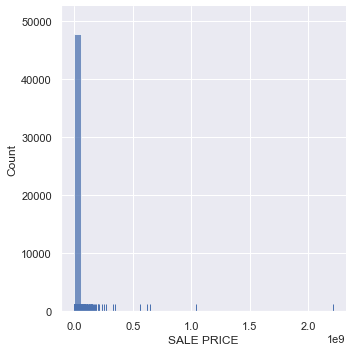

In [388]:
sns.displot(df['SALE PRICE'], bins=40, rug=True)

In [389]:
# Data SALE PRICE antara 10000 - 10000000
df2 = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 10000000)]

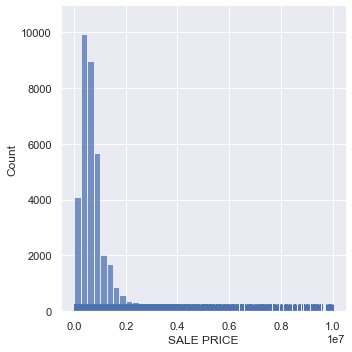

In [390]:
sns.displot(df2['SALE PRICE'], bins=40, rug=True)

In [391]:
df2['SALE PRICE'] = np.log(df2['SALE PRICE'])

<ipython-input-391-5f8292dc3667>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SALE PRICE'] = np.log(df2['SALE PRICE'])


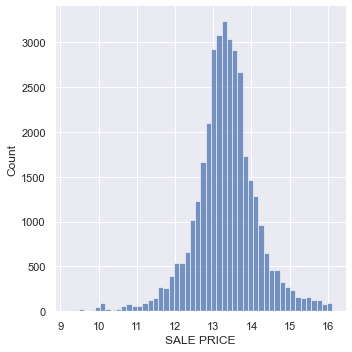

In [392]:
sns.displot(df2['SALE PRICE'], bins=50)

Berdasarkan kurva, dapat dilihat bahwa data sale price berdistribusi normal, karena kurva berbentuk lonceng simetris (bell curve)

## Confidence Intervals

In [393]:
# Berapa nilai confidence intervals proporsi properti residential units yang terjual dengan nilai > 5 pada Manhattan borough?
df_residential_units = df[['BOROUGH', 'RESIDENTIAL UNITS']]
df_residential_units

,BOROUGH,RESIDENTIAL UNITS
0,1,5
3,1,10
4,1,6
6,1,8
9,1,24
...,...,...
83778,5,2
83779,5,2
83780,5,2
83781,5,0


In [394]:
total_borough = df_residential_units[
    (df_residential_units['RESIDENTIAL UNITS'] < 5) 
    & (df_residential_units['BOROUGH'] == 1)].count()

total_borough = total_borough['BOROUGH']
total_borough

499

In [395]:
total = df_residential_units[df_residential_units['RESIDENTIAL UNITS'] > 5].count()

total = total['RESIDENTIAL UNITS']
total

2059

In [396]:
p_b = total_borough/total
p_b 

0.24235065565808644

In [397]:
n = total
se_b = np.sqrt(p_b*(1-p_b)/total)
se_b 

0.009443392744020312

In [398]:
z_score = 1.96
lcb = p_b - z_score* se_b #lower limit of the CI
ucb = p_b + z_score* se_b #upper limit of the CI
lcb, ucb

(0.22384160587980664, 0.2608597054363663)

Nilai confidence intervals proporsi properti residential units yang terjual dengan nilai > 5 pada Manhattan borough adalah pada rentang 0.2238 - 0.2608

## Hypothesis Testing

In [399]:
# Apakah terdapat perbedaan total units yang terjual pada Brooklyn dan Staten Island?
# H0 : μ1 = μ2 (tidak terdapat perbedaan total units)
# H1 : μ1 != μ2 (terdapat perbedaan total units)

In [400]:
Broonklyn = df[df["BOROUGH"] == 3]
Staten_Island = df[df["BOROUGH"] == 5]

In [401]:
n1 = len(Broonklyn)
mu1 = Broonklyn["TOTAL UNITS"].mean()
sd1 = Broonklyn["TOTAL UNITS"].std()

In [402]:
(n1, mu1, sd1)

(23843, 2.1942289141467097, 8.707408054816261)

In [403]:
n2 = len(Staten_Island)
mu2 = Staten_Island["TOTAL UNITS"].mean()
sd2 = Staten_Island["TOTAL UNITS"].std()

In [404]:
(n2, mu2, sd2)

(5041, 1.4538781987700853, 3.8135495349864446)

In [405]:
sm.stats.ztest(Broonklyn["TOTAL UNITS"].dropna(), Staten_Island["TOTAL UNITS"].dropna(),alternative='two-sided')

(5.917932063656472, 3.260145671981057e-09)

Diperoleh nilai p-value sebesar 3.2601e-09. Karena nilai p-value bernilai kurang dari alpha (0.05), maka keputusannya adalah tolak H0. Sehingga dapat disimpulkan bahwa terdapat perbedaan total units yang terjual pada Brooklyn dan Staten Island.